In [113]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import minimize

In [114]:
def load_data(file, delimiter):
    data = np.loadtxt(file, delimiter=delimiter)
    print('Shape: ', data.shape)
    print('First row: ', data[1, :])
    
    return data

### 1.1 Visualizing the data

In [115]:
def plot_data(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Find indices of positive and negative examples
    pos = data[:,2] == 1
    neg = data[:,2] == 0
    
    # Plot examples
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], label=label_pos, marker='+', color='k', linewidth=2)
    axes.scatter(data[neg][:,0], data[neg][:,1], label=label_neg, marker='o', color='y')
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend()

### 1.2.1 Warm-up: sigmoid function

In [116]:
data = load_data('./ex2data1.txt', ',')

Shape:  (100, 3)
First row:  [30.28671077 43.89499752  0.        ]


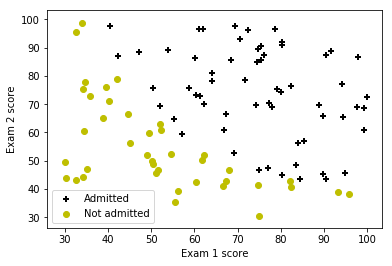

In [117]:
plot_data(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

In [118]:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

In [119]:
def test_sigmoid():
    print(sigmoid(0))
    print(sigmoid(100))
    print(sigmoid(np.zeros(2)))

In [120]:
test_sigmoid()

0.5
1.0
[0.5 0.5]


### 1.2.2 Cost function and gradient

In [121]:
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = np.c_[data[:,2]]

In [122]:
def cost_function(theta, X, y):
    m = len(y)
    hx = sigmoid(theta.dot(X.T))
    J = (-1/m)*(y.T.dot(np.log(hx)) + (1-y).T.dot(np.log(1-hx)))
    
    return J

In [123]:
def gradient(theta, X, y):
    m = len(y)
    hx = sigmoid(theta.dot(X.T))
    grad = (1/m)*((hx - y.T).dot(X))
    
    return grad.flatten()

In [124]:
theta = np.zeros((X.shape[1]))
cost = cost_function(theta, X, y)
grad = gradient(theta, X, y)

In [125]:
print(cost)
print(grad)

[0.69314718]
[ -0.1        -12.00921659 -11.26284221]


### 1.2.3 Learning parameters using fminunc

In [127]:
res = minimize(cost_function, theta, method='nelder-mead', args=(X,y), options={'maxiter':400})
print(res)

 final_simplex: (array([[-25.16130062,   0.20623142,   0.20147143],
       [-25.16135807,   0.20623176,   0.20147199],
       [-25.1613519 ,   0.20623203,   0.20147171],
       [-25.16137971,   0.20623202,   0.20147188]]), array([0.2034977, 0.2034977, 0.2034977, 0.2034977]))
           fun: 0.2034977015902151
       message: 'Optimization terminated successfully.'
          nfev: 287
           nit: 157
        status: 0
       success: True
             x: array([-25.16130062,   0.20623142,   0.20147143])


In [128]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return (p.astepe('int'))

In [129]:
sigmoid(np.array([1, 45, 85]).dot(res.x.T))

0.7762915904112411